In [88]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import collections
import itertools
import operator
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [32]:
data = open("sloan_papers.txt","r")

In [33]:
edges = dict()
G=nx.Graph()

    We will use the file with the papers to create the co-authorship network

In [34]:
for line in data:
        linef = line.strip().split("!")
        if linef[2] != "":
                authors = linef[2].strip().split(",")
                for i in range(len(authors)):
                        if authors[i].strip() not in G.nodes():
                                G.add_node(authors[i].strip())
                        for j in range(i+1,len(authors)):
                                k = min(authors[i].strip(),authors[j].strip())+"-"+max(authors[i].strip(),authors[j].strip())
                                if k not in edges.keys():
                                        edges[k] = 1
                                else:
                                        edges[k] += 1

for k in edges.keys():
        a1 = k.split("-")[0]
        a2 = k.split("-")[1]
        G.add_edge(min(a1,a2),max(a1,a2),weight=edges[k])

Following are some basic network attributes. As we see the network is fairly sparse, while there is not a big giant component that includes all the authors (or a large portion of them). The largest component is 30 authors, while the second largest is 21. 

Nodes:  293
Edges:  379


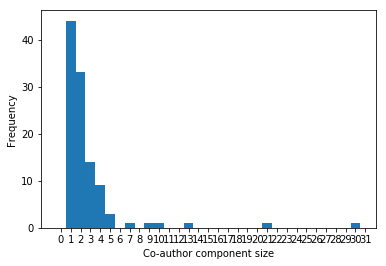

In [48]:
print "Nodes: ",len(G.nodes())
print "Edges: ",len(G.edges())
comp = np.array([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

bins = np.arange(0, comp.max() + 1.5) - 0.5
fig, ax = plt.subplots()
ax.set_xlabel("Co-author component size")
ax.set_ylabel("Frequency")
_ = ax.hist(comp, bins)
ax.set_xticks(bins + 0.5)
plt.show()

Next we calculate the page rank of each author. This is a sign of "importance" in this network. Following are the top-15 authors in the SSAC "history" until now. 

In [79]:
pr = nx.pagerank(G)

for key, value in sorted(pr.iteritems(), reverse=True, key=lambda (k,v): (v,k))[:10]:
    print "%s: %.5f" % (key, value)

0.00921274715732
Luke Bornn: 0.0257509272801
Patrick Lucey: 0.0150062858116
Jenna Wiens: 0.00921274715732
John Guttag: 0.00855584395646
Mehrsan Javan: 0.00800208246946
Peter Carr: 0.00789351620724
Kirk Goldsberry: 0.00776820326228
Peter Fader: 0.00624575231519
YuHan Chang: 0.00595344614311
Rajiv Maheswaran: 0.00595344614311


Following is an interactive visualization of the network so you can explore it more. 

In [110]:
pos = nx.circular_layout(G)
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='grey'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])
        
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Hot',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Page Rank',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple([pr[node]])
    node_info = str(node)+": "+str(round(pr[node],5))
    node_trace['text']+=tuple([node_info])
    

In [111]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='SSAC Co-Author network',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Pelechrinis (2019)",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig, filename='networkx')